 <img src="https://drive.google.com/uc?id=18x0Fa9XWHlnH5OWkZ-UMrJVQCdsEmYQw" width=300/>

## Big Data - Prática em BD e BD II [2022/02] </br></br> Laboratório: Clustering de Texto

### Professor Altigran da Silva

## Aplicação de Exemplo - Agrupamento de Comentários
---

- Dispomos de comentários de usuários sobre viagens aérea que realizaram. Cada texto de comentário será considerado um documento.

- A tarefa é agrupar comentários similares usando algoritmo K-means

- Para isso, para cada documento, vamos gerar um vetor de acordo com o modelo vetorial

- Os dados serão lidos de um arquivo texto e processados usando os recursos Spark, com DataFrames e MLlib.


## Tratamento de Documentos Textuais
--- 

- Diversas aplicações importantes envolvem tratamento de documentos textuais. 
- Esta aplicações podem utilizar várias técnicas computacionais, entre elas:
  - Mineração de texto: cluster de documentos, extração de tópicos 
  - Categorização: atribuir documentos a categorias em taxonomias
  - Extração de entidades: extração de nomes, endereços, dados de produtos etc.
  - Análise de sentimento: avaliar se um documento/ é positiva, negativa ou neutro quanto a um tópico
  - Linguística: extração de semântica, propósito, etc.
- Técnicas implementadas por algoritmos de ML e/ou RI

## Tratamento de Documentos Textuais
---

- Vários destes algoritmos manipulam __vetores de características__ (_feature vectores_) 

- No caso de documentos textuais é preciso representar adequadamente os documentos utilizando estes vetores.

- Exemplos de documentos: páginas Web, avaliações de usuários, artigos científicos, posts de usuários em redes sociais, documentos legais, médicos, financeiros, administrativos, ...

- Embora muitos diversos entre si, existem formas de representação comuns que funcionam bem para várias aplicações.



## Representação de Documentos
---

- Vetor  $\color{blue}{d = \langle w_1,w_2,\ldots,w_n \rangle}$ representa o doc no espaço $\color{blue}{n}$-dimensional

- Alternativas
  -  Ocorrência: $\color{blue}{w_i}=1$ se ocorre no doc ou $\color{blue}{w_i}=0$ se não ocorre
  - _Bag-of-Words_: $\color{blue}{w_i}$ é a frequência do termo no documento
  - _n-gramas_ : $\color{blue}{w_i}$ é a frequência do n-grama no documento
  - _TF-IDF_:  $\color{blue}{w_i}$ calculado usando pesos TF-IDF
  - _Embdeddingd_:  $\color{blue}{w_i}$ reflete o contexto linguístico da palavra



## Modelo Vetorial
---
- _Vector Space Moldel_ [[Salton et al.,1975]](https://dl.acm.org/doi/10.1145/361219.361220)
- Documentos de texto representados por vetores 
  - $\color{blue}{d = \langle w_1, w_2,\ldots, w_n\rangle}$
  - $\color{blue}{w_i \neq 0}$ se a palavra $\color{blue}{x_i}$ ocorre no documento
  - $\color{blue}{w_i = 0}$ se a palavra $\color{blue}{x_i}$ não ocorre no documento
 -  $\color{blue}{\{ x_1, x_2,\ldots, x_n\}}$ = __vocabulário__ : conjunto de todas as palavras que ocorrem na coleção de documentos


## Modelo Vetorial
--- 

  - A cada palvra ou _termo_ $\color{blue}{x_i}$ é associado um vetor unário 
    - Assume-se que os vetores de termos são ortogonais
    - Isso implica em que assumir que os termos ocorrem independentemente
  - Os $\color{blue}{t}$ vetores unários formam a base ortonormal de um espaço $\color{blue}{t}$-dimensional
  
  - Neste espaço, documentos são representados como vetores ponderados.
 
<center>
$\color{blue}{\overrightarrow{d_{j}}=\left(w_{1 j}, w_{2 j}, \ldots, w_{tj}\right), k_{i} \in d_j w_{ij}>0}$
</center>

  - No contexto de busca de documentos, _consultas_ também são representados assim
 
<center>
$\color{blue}{\overrightarrow{q}=\left(w_{1 q}, w_{2 q}, \ldots, w_{tq}\right), k_{i} \in q, w_{iq}>0}$
 </center>
    


## Modelo Vetorial - Pesos Baseados em Ocorrência
---
- Projeções com tamanho 0 ou 1: Peso 1 se o termo ocorre no doc, ou 0 se não ocorre

<table>
    <tr>
   <td>  </td> <td>  </td>
  </tr>
  <tr>
 <td>
    <center> <img src="https://drive.google.com/uc?id=1FTgozyIe09-88Anhu8M5PQmy7d8OzELg" width=300/> </center>
</td>
   <td>
       
|       | hard  | drive | test  | $$Q\cdot{D_x}$$   | $$||D_x||$$     | $$\cos(\theta)$$ | $$\theta$$ (graus) |
| :---  | :---: | :---: | :---: | :---:              | :---: | :---:      | :---:              |
| $$Q$$     |     1 | 1     | 1     |                    | 1.732 |            |                    |
|$$D_1$$| 1 | 0 | 0 | 1 | 1.000 | 0.577 | 54.736 |
|$$D_2$$| 1 | 1 | 0 | 2 | 1.414 | 0.816 | 35.264 |
|$$D_3$$| 0 | 1 | 1 | 2 | 1.414 | 0.816 | 35.264 |
|$$D_4$$| 1 | 1 | 1 | 3 | 1.732 | 1.000 | 0 |
|$$D_5$$| 1 | 0 | 1 | 2 | 1.414 | 0.816 | 35.264 |
       
   <td>
</tr>
</table>       

<table>
<tr> <td> $Q$ = <b>hard drive test</b> <td> </tr>
<tr> <td> $D_1$ = "...it's <b>hard</b> to determine..." <td> </tr>
    <tr> <td> $D_2$  = "...this <b>hard drive</b> has 100GB of memory...make sure the <b>drive</b> is fully installed...} <td> </tr>
<tr> <td> $D_3$  = "...before I bought my new car, I took it out for a <b>test drive</b>..."  <td> </tr>
<tr> <td> $D_4$  = "...as part of the factory acceptance, every unit gets a <b>hard drive test</b>..."  <td> </tr>
<tr> <td> $D_5$  = "...I think I failed, that was a <b>hard test</b>...a standardized <b>test</b> is design to be <b>hard</b> for..." <td> </tr>
<table>
    
    
<font size="2">[Adaptado de Simple Data Bining Blog](http://simpledatamining.blogspot.com/2015/03/simple-text-retrieval-vector-space.html)</font>    

## Modelo Vetorial - Pesos Baseados em Frequência
---
- Assume projeções/pesos baseados na frequência dos termos dos documentos

<table>
    <tr>
   <td>  </td> <td>  </td>
  </tr>
  <tr>
 <td>
    <center> <img src="https://drive.google.com/uc?id=1FT5fNwHUQBj0lcX6WiMkbBTZRuGcluMq" width=300/> </center>
</td>
   <td>
       
|       | hard  | drive | test  | $$Q\cdot{D_x}$$   | $$||D_x||$$     | $$\cos(\theta)$$ | $$\theta$$ (graus) |
| :---  | :---: | :---: | :---: | :---:              | :---: | :---:      | :---:              |
| Q     |     1 | 1     | 1     |                    | 1.732 |            |                    |
|$$D_1$$| 1 | 0 | 0 | 1 | 1.000 | 0.577 | 54.736 |
|$$D_2$$| 1 | 2 | 0 | 3 | 2.236 | 0.775 | 39.232 |
|$$D_3$$| 0 | 1 | 1 | 2 | 1.414 | 0.816 | 35.264 |
|$$D_4$$| 1 | 1 | 1 | 3 | 1.732 | 1.000 | 0 |
|$$D_5$$| 2 | 0 | 2 | 4 | 2.828 | 0.816 | 35.264 |
       
   <td>
</tr>
</table>       

<table>
<tr> <td> $Q$ = <b>hard drive test</b> <td> </tr>
<tr> <td> $D_1$ = "...it's <b>hard</b> to determine..." <td> </tr>
    <tr> <td> $D_2$  = "...this <b>hard drive</b> has 100GB of memory...make sure the <b>drive</b> is fully installed...} <td> </tr>
<tr> <td> $D_3$  = "...before I bought my new car, I took it out for a <b>test drive</b>..."  <td> </tr>
<tr> <td> $D_4$  = "...as part of the factory acceptance, every unit gets a <b>hard drive test</b>..."  <td> </tr>
<tr> <td> $D_5$  = "...I think I failed, that was a <b>hard test</b>...a standardized <b>test</b> is design to be <b>hard</b> for..." <td> </tr>
<table>
    
    
<font size="2">[Adaptado de Simple Data Bining Blog](http://simpledatamining.blogspot.com/2015/03/simple-text-retrieval-vector-space.html)</font>    

## Modelo Vetorial - Caso Geral
---

- Coleção de Documentos: $\color{blue}{d_1,d_2,\ldots,d_j,\ldots,d_{n-1},d_{n}}$

- $\color{blue}{w_{i,j}}$: tamanho da projeção do termo $\color{blue}{x_{i}}$ no eixo $\color{blue}{j}$ ou “peso” de $\color{blue}{x_{i}}$ no documento $\color{blue}{d_j}$

- $\color{blue}{\overrightarrow{d_{j}}=\left(w_{1 j}, w_{2 j}, \ldots, w_{tj}\right), k_{i} \in d_j \mbox{ e } w_{ij}>0}$: Vetor que representa  $\color{blue}{d_j}$ no espaço multi-dimensional de termos.


- _Bag-of-Words_ é um caso particular do modelo vetorial onde $\color{blue}{w_{i,j}}$  é a frequência do termo no documento

## Pesos - Intuição
---

- Sejam
  - $\color{blue}{C}$ uma coleção de documentos (corpus) 
  - $\color{blue}{A \subseteq C}$ um conjunto de documentos considerados relevantes de acordo com a especificação de uma consulta do usuário
  
- Determinar
  - O que caracteriza os docs em a $\color{blue}{A}$ ⇨ Similaridade Intra-Cluster (SIC)
  -  O que caracteriza os docs fora de  $\color{blue}{A}$ ⇨ Disimilaridade Inter-Cluster (DIC)


## Pesos - Intuição
---

- Similaridade Intra-Cluster: medida pela frequência bruta de $\color{blue}{x_i}$ em $\color{blue}{d_j}$
  - Fator $\color{blue}{\textit{tf}(i,j)}$: fornece a medida de quão bem o termo descreve o documento.
  
- A disimilaridade Inter-Cluster mede o inverso da frequência do termo $\color{blue}{x_i}$ na coleção 
   - Fator $\color{blue}{\textit{idf}(i)}$: termos que aparecem em muitos documentos não são uteis para distinguir a sua relevância.
   
- Devemos tentar _balancear_ estes dois efeitos
  - $\color{blue}{w_{i,j}=\textit{tf}(i,j)\times\textit{idf}(i)}$


## Frequência do Termo - tf
---

-  _Term Frequency_  
-  A frequência normalizada do termo $\color{blue}{x_i}$ no doc $\color{blue}{d_j}$ é:
   - $\color{blue}{\text{tf}(i,j)=\frac{\text{freq}_{i,j}}{\max_l\text{freq}_{l,j}}}$
   
- $\color{blue}{\text{freq}_{i,j}}$= freq. bruta do termo $\color{blue}{x_i}$ no doc $\color{blue}{d_j}$  = num. de vezes em que $\color{blue}{x_i}$  aparece em $\color{blue}{d_j}$

- $\color{blue}{\max_l\text{freq}_{l,j}}$ = freq. bruta do termo $\color{blue}{x_l}$ mais frequente em $\color{blue}{d_j}$


## Frequência Inversa em Documentos - idf
---

- _Inverse Document Frequency_ 

- $\color{blue}{\text{idf}(i)=\log \left(\frac{N}{n_i}\right)}$
  - $\color{blue}{N}$ = nr. total de docs. na coleção
  - $\color{blue}{n_i}$ = nr. de docs. em que o termo  $\color{blue}{x_i}$ ocorre

- Tenta expressar a importância de um termo dentro de uma coleção.

- Quanto mais raro o termo, maior seu idf


## Pesos: Esquema tf-idf
---

- Assim temos:

    - $\color{blue}{w_{i,j}=\textit{tf}(i,j)\times\textit{idf}(i)}$

    - $\color{blue}{w_{i,j}=\textit{tf}(i,j)\times\log \left(\frac{N}{n_i}\right)}$
    
- O log tem a função de tornar as duas grandezas comparáveis.


## Exemplo
---

<table>
    <tr>
   <td> 
       
|     Docs    |     Termos     |
|:-:|:-:|
|     $$\color{blue}{d_1}$$      |     A A A B    |
|     $$\color{blue}{d_2}$$     |     A A C      |
|     $$\color{blue}{d_3}$$     |     A A        |
|     $$\color{blue}{d_4}$$     |     B B        |
   
       
   <td>  
        $$\color{blue}{\text{idf}(A)=\log \left(\frac{4}{3}\right)=0,28}$$  

$$\color{blue}{\text{idf}(B)=\log \left(\frac{4}{2}\right)=0,69}$$

$$\color{blue}{w\left(d_1, A\right)=i d f(A) \times t f\left(d_1, A\right)-0,28 \times 3=0,84}$$ 

$$\color{blue}{w\left(d_1, B\right)=i d f(B) \times t f\left(d_1, B\right)-0,69 \times 1=0,69}$$

$$\color{blue}{w\left(d_1, C\right)=i d f(C) \times t f\left(d_1, C\right)-1,28 \times 0=0}$$

$$\color{blue}{\overrightarrow{d_1}=(0,84 ; 0,69 ; 0)}$$
   </td>
  </tr>
<table>


## Modelo Vetorial - Similaridade 
--- 

- _Similariade_ entre documentos: o quão próximo os vetores estão no espaço de termos?

<center> <img src="https://drive.google.com/uc?id=1FN9czlmZEkp4IwWgDWUCGgzOZrswwwHA" width=600/> </center>


## Modelo Vetorial - Medida do Cosseno
---

- _Similariade_ entre documentos: o quão próximo os vetores estão no espaço de termos?

   - $\color{blue}{\text{sim}\left(d_j, d_k\right)=\cos(\theta)}$

   - $\color{blue}{\text{sim}\left(d_j, d_k\right)=\frac{\vec{d_j} \bullet \vec{d_k}}{|\vec{d_j}| \times|\vec{d_k}|}=\frac{\sum_{i=1}^t w_{i,j} \times w_{i,k}}{\sqrt{\sum_{i=1}^t w_{i,j}^2} \times \sqrt{\sum_{i=1}^t w_{i,k}^2}}}$

- Para $\color{blue}{w_{i,j} \geq 0}$  e  $\color{blue}{w_{i,k} \geq 0}$,  $\color{blue}{\text{sim}\left(d_j, k\right) \in [0,1]}$


- No contexto de tarefas de busca,  $\color{blue}{d_k}$ é uma consulta $\color{blue}{q}$.

## Aplicação de Exemplo - Agrupamento de Comentários
---

- Dispomos de comentários de usuários sobre viagens aérea que realizaram. Cada texto de comentário será considerado um documento.

- A tarefa é agrupar comentários similares usando algoritmo K-means

- Para isso, para cada documento, vamos gerar um vetor de acordo com o modelo vetorial

- Os dados serão lidos de um arquivo texto e processados usando os recursos Spark, com DataFrames e MLlib.


In [1]:
spark.stop()

In [2]:
from pyspark import *
from pyspark.sql import *
spark = SparkSession.builder.appName('LabTextClustering').getOrCreate()

In [3]:
from pyspark.sql.functions import monotonically_increasing_id

## Arquivo obtido em https://github.com/pouyafattahi/Airline_Ranking/blob/master/airline.csv
## Criar dataframe "rawdata" com os registros dos comentários
rawdata = spark.read.load("/Users/alti/Downloads/airline.csv", format="csv", header=True)

rawdata.printSchema()

root
 |-- airline_name: string (nullable = true)
 |-- link: string (nullable = true)
 |-- title: string (nullable = true)
 |-- author: string (nullable = true)
 |-- author_country: string (nullable = true)
 |-- date: string (nullable = true)
 |-- content: string (nullable = true)
 |-- aircraft: string (nullable = true)
 |-- type_traveller: string (nullable = true)
 |-- cabin_flown: string (nullable = true)
 |-- route: string (nullable = true)
 |-- overall_rating: string (nullable = true)
 |-- seat_comfort_rating: string (nullable = true)
 |-- cabin_staff_rating: string (nullable = true)
 |-- food_beverages_rating: string (nullable = true)
 |-- inflight_entertainment_rating: string (nullable = true)
 |-- ground_service_rating: string (nullable = true)
 |-- wifi_connectivity_rating: string (nullable = true)
 |-- value_money_rating: string (nullable = true)
 |-- recommended: string (nullable = true)



In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

rawdata.limit(5).toPandas()


,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
0,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,D Ito,Germany,2015-04-10,Outbound flight FRA/PRN A319. 2 hours 10 min flight. I thought drinks/snacks for sale but sandwich soft drinks were served complimentary. Inbound flights SKP/LJU/FRA CRJ900. each 1 hour 30 min flight. Skyshop menu was in a seat pocket and drinks/snacks were for sale. All flight crews were friendly. Security check at the Ljubljana airport for transit passengers was chaos however it's possible to go to a gate within 30min.,None,None,Economy,None,7.0,4.0,4.0,4.0,0.0,None,None,4.0,1
1,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Ron Kuhlmann,United States,2015-01-05,Two short hops ZRH-LJU and LJU-VIE. Very fast on CRJ 90. Seats comfortable and crew was fine. Ground services good and lounge was quite nice.,None,None,Business Class,None,10.0,4.0,5.0,4.0,1.0,None,None,5.0,1
2,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,E Albin,Switzerland,2014-09-14,Flew Zurich-Ljubljana on JP365 newish CRJ900. Flight almost full departure on time. Service on board by 2 pleasant and friendly female flight attendants. I bought coffee mineral water and a very nice and fresh filled croissant for EUR 6. Good value!,None,None,Economy,None,9.0,5.0,5.0,4.0,0.0,None,None,5.0,1
3,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,Tercon Bojan,Singapore,2014-09-06,Adria serves this 100 min flight from Ljubljana to Amsterdam on a brand new CRJ900 Next Gen which has a hugely improved cabin. Much more spacious higher ceiling and with big windows. The seats seem to be more comfortable and have more legroom. The business class is not separated from the main cabin though not even with the standard back seat curtain. The food offering could be slightly improved for usually I've had good meals on Adria.,None,None,Business Class,None,8.0,4.0,4.0,3.0,1.0,None,None,4.0,1
4,adria-airways,/airline-reviews/adria-airways,Adria Airways customer review,L James,Poland,2014-06-16,"""WAW-SKJ Economy. No free snacks or drinks on this Star Alliance partner. Just full legacy carrier fares for basically a budget airline. Flying out of Poland had no Euros or USD on me. I was thirsty and asked to purchase a bottle of water. The stewardess said that I could not buy it and could not use a credit card or purchase it in cash without their preferred currency. When I pointed out that they were able to sell duty free with visa cards she huffed and puffed and basically said it would be """"difficult"""". She never offered me a tiny cup of water. On the way back I switched to Turkish Airlines via IST and got a free 3 course meal on both segments and friendly service.""",None,None,Economy,None,4.0,4.0,2.0,1.0,2.0,None,None,2.0,0


In [5]:
rawdata.select("content").limit(5).toPandas()

,content
0,Outbound flight FRA/PRN A319. 2 hours 10 min flight. I thought drinks/snacks for sale but sandwich soft drinks were served complimentary. Inbound flights SKP/LJU/FRA CRJ900. each 1 hour 30 min flight. Skyshop menu was in a seat pocket and drinks/snacks were for sale. All flight crews were friendly. Security check at the Ljubljana airport for transit passengers was chaos however it's possible to go to a gate within 30min.
1,Two short hops ZRH-LJU and LJU-VIE. Very fast on CRJ 90. Seats comfortable and crew was fine. Ground services good and lounge was quite nice.
2,Flew Zurich-Ljubljana on JP365 newish CRJ900. Flight almost full departure on time. Service on board by 2 pleasant and friendly female flight attendants. I bought coffee mineral water and a very nice and fresh filled croissant for EUR 6. Good value!
3,Adria serves this 100 min flight from Ljubljana to Amsterdam on a brand new CRJ900 Next Gen which has a hugely improved cabin. Much more spacious higher ceiling and with big windows. The seats seem to be more comfortable and have more legroom. The business class is not separated from the main cabin though not even with the standard back seat curtain. The food offering could be slightly improved for usually I've had good meals on Adria.
4,"""WAW-SKJ Economy. No free snacks or drinks on this Star Alliance partner. Just full legacy carrier fares for basically a budget airline. Flying out of Poland had no Euros or USD on me. I was thirsty and asked to purchase a bottle of water. The stewardess said that I could not buy it and could not use a credit card or purchase it in cash without their preferred currency. When I pointed out that they were able to sell duty free with visa cards she huffed and puffed and basically said it would be """"difficult"""". She never offered me a tiny cup of water. On the way back I switched to Turkish Airlines via IST and got a free 3 course meal on both segments and friendly service."""


In [6]:
## fillna : se a coluna "content" tem valor null, substitui pela string vazia 
rawdata = rawdata.fillna({"content":""})

# withColumn: adiciona nova coluna uid no DataFrame rawdata. Conteudo é um contador incremental
rawdata = rawdata.withColumn("uid", monotonically_increasing_id())

# select : projeção das colunas uid e contente. Resultado é o novo Dataframe reviews
reviews = rawdata.select("uid","content")
reviews.limit(5).toPandas()

,uid,content
0,0,Outbound flight FRA/PRN A319. 2 hours 10 min flight. I thought drinks/snacks for sale but sandwich soft drinks were served complimentary. Inbound flights SKP/LJU/FRA CRJ900. each 1 hour 30 min flight. Skyshop menu was in a seat pocket and drinks/snacks were for sale. All flight crews were friendly. Security check at the Ljubljana airport for transit passengers was chaos however it's possible to go to a gate within 30min.
1,1,Two short hops ZRH-LJU and LJU-VIE. Very fast on CRJ 90. Seats comfortable and crew was fine. Ground services good and lounge was quite nice.
2,2,Flew Zurich-Ljubljana on JP365 newish CRJ900. Flight almost full departure on time. Service on board by 2 pleasant and friendly female flight attendants. I bought coffee mineral water and a very nice and fresh filled croissant for EUR 6. Good value!
3,3,Adria serves this 100 min flight from Ljubljana to Amsterdam on a brand new CRJ900 Next Gen which has a hugely improved cabin. Much more spacious higher ceiling and with big windows. The seats seem to be more comfortable and have more legroom. The business class is not separated from the main cabin though not even with the standard back seat curtain. The food offering could be slightly improved for usually I've had good meals on Adria.
4,4,"""WAW-SKJ Economy. No free snacks or drinks on this Star Alliance partner. Just full legacy carrier fares for basically a budget airline. Flying out of Poland had no Euros or USD on me. I was thirsty and asked to purchase a bottle of water. The stewardess said that I could not buy it and could not use a credit card or purchase it in cash without their preferred currency. When I pointed out that they were able to sell duty free with visa cards she huffed and puffed and basically said it would be """"difficult"""". She never offered me a tiny cup of water. On the way back I switched to Turkish Airlines via IST and got a free 3 course meal on both segments and friendly service."""


In [7]:
from pyspark.ml.feature import Tokenizer

# Cria um extrator de termos ou Tokenizer que lê de inputCol e escreve o resultado em outputCol
# Em seguida executa o tokenizer sobre o dataframe "reviews" e escreve o resultado em "reviews"
tokenizer = Tokenizer(inputCol="content", outputCol="tokens")
reviews = tokenizer.transform(reviews)

In [8]:
reviews.limit(5).toPandas()

,uid,content,tokens
0,0,Outbound flight FRA/PRN A319. 2 hours 10 min flight. I thought drinks/snacks for sale but sandwich soft drinks were served complimentary. Inbound flights SKP/LJU/FRA CRJ900. each 1 hour 30 min flight. Skyshop menu was in a seat pocket and drinks/snacks were for sale. All flight crews were friendly. Security check at the Ljubljana airport for transit passengers was chaos however it's possible to go to a gate within 30min.,"[outbound, flight, fra/prn, a319., 2, hours, 10, min, flight., i, thought, drinks/snacks, for, sale, but, sandwich, soft, drinks, were, served, complimentary., inbound, flights, skp/lju/fra, crj900., each, 1, hour, 30, min, flight., skyshop, menu, was, in, a, seat, pocket, and, drinks/snacks, were, for, sale., all, flight, crews, were, friendly., security, check, at, the, ljubljana, airport, for, transit, passengers, was, chaos, however, it's, possible, to, go, to, a, gate, within, 30min.]"
1,1,Two short hops ZRH-LJU and LJU-VIE. Very fast on CRJ 90. Seats comfortable and crew was fine. Ground services good and lounge was quite nice.,"[two, short, hops, zrh-lju, and, lju-vie., very, fast, on, crj, 90., seats, comfortable, and, crew, was, fine., ground, services, good, and, lounge, was, quite, nice.]"
2,2,Flew Zurich-Ljubljana on JP365 newish CRJ900. Flight almost full departure on time. Service on board by 2 pleasant and friendly female flight attendants. I bought coffee mineral water and a very nice and fresh filled croissant for EUR 6. Good value!,"[flew, zurich-ljubljana, on, jp365, newish, crj900., flight, almost, full, departure, on, time., service, on, board, by, 2, pleasant, and, friendly, female, flight, attendants., i, bought, coffee, mineral, water, and, a, very, nice, and, fresh, filled, croissant, for, eur, 6., good, value!]"
3,3,Adria serves this 100 min flight from Ljubljana to Amsterdam on a brand new CRJ900 Next Gen which has a hugely improved cabin. Much more spacious higher ceiling and with big windows. The seats seem to be more comfortable and have more legroom. The business class is not separated from the main cabin though not even with the standard back seat curtain. The food offering could be slightly improved for usually I've had good meals on Adria.,"[adria, serves, this, 100, min, flight, from, ljubljana, to, amsterdam, on, a, brand, new, crj900, next, gen, which, has, a, hugely, improved, cabin., much, more, spacious, higher, ceiling, and, with, big, windows., the, seats, seem, to, be, more, comfortable, and, have, more, legroom., the, business, class, is, not, separated, from, the, main, cabin, though, not, even, with, the, standard, back, seat, curtain., the, food, offering, could, be, slightly, improved, for, usually, i've, had, good, meals, on, adria.]"
4,4,"""WAW-SKJ Economy. No free snacks or drinks on this Star Alliance partner. Just full legacy carrier fares for basically a budget airline. Flying out of Poland had no Euros or USD on me. I was thirsty and asked to purchase a bottle of water. The stewardess said that I could not buy it and could not use a credit card or purchase it in cash without their preferred currency. When I pointed out that they were able to sell duty free with visa cards she huffed and puffed and basically said it would be """"difficult"""". She never offered me a tiny cup of water. On the way back I switched to Turkish Airlines via IST and got a free 3 course meal on both segments and friendly service.""","[""waw-skj, economy., no, free, snacks, or, drinks, on, this, star, alliance, partner., just, full, legacy, carrier, fares, for, basically, a, budget, airline., flying, out, of, poland, had, no, euros, or, usd, on, me., i, was, thirsty, and, asked, to, purchase, a, bottle, of, water., the, stewardess, said, that, i, could, not, buy, it, and, could, not, use, a, credit, card, or, purchase, it, in, cash, without, their, preferred, currency., when, i, pointed, out, that, they, were, able, to, sell, duty, free, with, visa, cards, s

In [9]:
from pyspark.ml.feature import StopWordsRemover

locale = sc._jvm.java.util.Locale
locale.setDefault(locale.forLanguageTag("en-US"))

# StopWordsRemover: Entrada coluna tokens e saída nova coluna words
swremover = StopWordsRemover(inputCol="tokens", outputCol="words")

# Executa o removedor. Resultado vai para o DataFrame “reviews”
reviews = swremover.transform(reviews)



In [10]:
reviews.limit(5).toPandas()

,uid,content,tokens,words
0,0,Outbound flight FRA/PRN A319. 2 hours 10 min flight. I thought drinks/snacks for sale but sandwich soft drinks were served complimentary. Inbound flights SKP/LJU/FRA CRJ900. each 1 hour 30 min flight. Skyshop menu was in a seat pocket and drinks/snacks were for sale. All flight crews were friendly. Security check at the Ljubljana airport for transit passengers was chaos however it's possible to go to a gate within 30min.,"[outbound, flight, fra/prn, a319., 2, hours, 10, min, flight., i, thought, drinks/snacks, for, sale, but, sandwich, soft, drinks, were, served, complimentary., inbound, flights, skp/lju/fra, crj900., each, 1, hour, 30, min, flight., skyshop, menu, was, in, a, seat, pocket, and, drinks/snacks, were, for, sale., all, flight, crews, were, friendly., security, check, at, the, ljubljana, airport, for, transit, passengers, was, chaos, however, it's, possible, to, go, to, a, gate, within, 30min.]","[outbound, flight, fra/prn, a319., 2, hours, 10, min, flight., thought, drinks/snacks, sale, sandwich, soft, drinks, served, complimentary., inbound, flights, skp/lju/fra, crj900., 1, hour, 30, min, flight., skyshop, menu, seat, pocket, drinks/snacks, sale., flight, crews, friendly., security, check, ljubljana, airport, transit, passengers, chaos, however, possible, go, gate, within, 30min.]"
1,1,Two short hops ZRH-LJU and LJU-VIE. Very fast on CRJ 90. Seats comfortable and crew was fine. Ground services good and lounge was quite nice.,"[two, short, hops, zrh-lju, and, lju-vie., very, fast, on, crj, 90., seats, comfortable, and, crew, was, fine., ground, services, good, and, lounge, was, quite, nice.]","[two, short, hops, zrh-lju, lju-vie., fast, crj, 90., seats, comfortable, crew, fine., ground, services, good, lounge, quite, nice.]"
2,2,Flew Zurich-Ljubljana on JP365 newish CRJ900. Flight almost full departure on time. Service on board by 2 pleasant and friendly female flight attendants. I bought coffee mineral water and a very nice and fresh filled croissant for EUR 6. Good value!,"[flew, zurich-ljubljana, on, jp365, newish, crj900., flight, almost, full, departure, on, time., service, on, board, by, 2, pleasant, and, friendly, female, flight, attendants., i, bought, coffee, mineral, water, and, a, very, nice, and, fresh, filled, croissant, for, eur, 6., good, value!]","[flew, zurich-ljubljana, jp365, newish, crj900., flight, almost, full, departure, time., service, board, 2, pleasant, friendly, female, flight, attendants., bought, coffee, mineral, water, nice, fresh, filled, croissant, eur, 6., good, value!]"
3,3,Adria serves this 100 min flight from Ljubljana to Amsterdam on a brand new CRJ900 Next Gen which has a hugely improved cabin. Much more spacious higher ceiling and with big windows. The seats seem to be more comfortable and have more legroom. The business class is not separated from the main cabin though not even with the standard back seat curtain. The food offering could be slightly improved for usually I've had good meals on Adria.,"[adria, serves, this, 100, min, flight, from, ljubljana, to, amsterdam, on, a, brand, new, crj900, next, gen, which, has, a, hugely, improved, cabin., much, more, spacious, higher, ceiling, and, with, big, windows., the, seats, seem, to, be, more, comfortable, and, have, more, legroom., the, business, class, is, not, separated, from, the, main, cabin, though, not, even, with, the, standard, back, seat, curtain., the, food, offering, could, be, slightly, improved, for, usually, i've, had, good, meals, on, adria.]","[adria, serves, 100, min, flight, ljubljana, amsterdam, brand, new, crj900, next, gen, hugely, improved, cabin., much, spacious, higher, ceiling, big, windows., seats, seem, comfortable, legroom., business, class, separated, main, cabin, though, even, standard, back, seat, curtain., food, offering, slightly, improved, usually, good, meals, adria.]"
4,4,"""WAW-SKJ Economy. No free snacks or drinks on this Star Alliance partner. Just full 

In [11]:
from pyspark.ml.feature import CountVectorizer

# CountVectorizer: Conta as ocorrências de valores distintos nos arrays de todas as linhas da coluna words.
# Cria um vetor de contadores para cada palavra ocorrendo em cada linha. Saída na nova coluna rawFeatures
cv = CountVectorizer(inputCol="words", outputCol="rawFeatures", vocabSize = 1000)
cvmodel = cv.fit(reviews)
feat_reviews = cvmodel.transform(reviews)

In [13]:
feat_reviews.limit(5).toPandas()

,uid,content,tokens,words,rawFeatures
0,0,Outbound flight FRA/PRN A319. 2 hours 10 min flight. I thought drinks/snacks for sale but sandwich soft drinks were served complimentary. Inbound flights SKP/LJU/FRA CRJ900. each 1 hour 30 min flight. Skyshop menu was in a seat pocket and drinks/snacks were for sale. All flight crews were friendly. Security check at the Ljubljana airport for transit passengers was chaos however it's possible to go to a gate within 30min.,"[outbound, flight, fra/prn, a319., 2, hours, 10, min, flight., i, thought, drinks/snacks, for, sale, but, sandwich, soft, drinks, were, served, complimentary., inbound, flights, skp/lju/fra, crj900., each, 1, hour, 30, min, flight., skyshop, menu, was, in, a, seat, pocket, and, drinks/snacks, were, for, sale., all, flight, crews, were, friendly., security, check, at, the, ljubljana, airport, for, transit, passengers, was, chaos, however, it's, possible, to, go, to, a, gate, within, 30min.]","[outbound, flight, fra/prn, a319., 2, hours, 10, min, flight., thought, drinks/snacks, sale, sandwich, soft, drinks, served, complimentary., inbound, flights, skp/lju/fra, crj900., 1, hour, 30, min, flight., skyshop, menu, seat, pocket, drinks/snacks, sale., flight, crews, friendly., security, check, ljubljana, airport, transit, passengers, chaos, however, possible, go, gate, within, 30min.]","(2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...)"
1,1,Two short hops ZRH-LJU and LJU-VIE. Very fast on CRJ 90. Seats comfortable and crew was fine. Ground services good and lounge was quite nice.,"[two, short, hops, zrh-lju, and, lju-vie., very, fast, on, crj, 90., seats, comfortable, and, crew, was, fine., ground, services, good, and, lounge, was, quite, nice.]","[two, short, hops, zrh-lju, lju-vie., fast, crj, 90., seats, comfortable, crew, fine., ground, services, good, lounge, quite, nice.]","(0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...)"
2,2,Flew Zurich-Ljubljana on JP365 newish CRJ900. Flight almost full departure on time. Service on board by 2 pleasant and friendly female flight attendants. I bought coffee mineral water and a very nice and fresh filled croissant for EUR 6. Good value!,"[flew, zurich-ljubljana, on, jp365, newish, crj900., flight, almost, full, departure, on, time., service, on, board, by, 2, pleasant, and, friendly, female, flight, attendants., i, bought, coffee, mineral, water, and, a, very, nice, and, fresh, filled, croissant, for, eur, 6., good, value!]","[flew, zurich-ljubljana, jp365, newish, crj900., flight, almost, full, departure, time., service, board, 2, pleasant, friendly, female, flight, attendants., bought, coffee, mineral, water, nice, fresh, filled, croissant, eur, 6., good, value!]","(2.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [14]:
from pyspark.ml.feature import IDF

# IDF: Calcula os valore de TF-IDF usando os vetores de rawFeatures.
idf = IDF(inputCol="rawFeatures", outputCol="features")
idfModel = idf.fit(feat_reviews)
feat_reviews = idfModel.transform(feat_reviews)

In [15]:
feat_reviews.limit(5).toPandas()

,uid,content,tokens,words,rawFeatures,features
0,0,Outbound flight FRA/PRN A319. 2 hours 10 min flight. I thought drinks/snacks for sale but sandwich soft drinks were served complimentary. Inbound flights SKP/LJU/FRA CRJ900. each 1 hour 30 min flight. Skyshop menu was in a seat pocket and drinks/snacks were for sale. All flight crews were friendly. Security check at the Ljubljana airport for transit passengers was chaos however it's possible to go to a gate within 30min.,"[outbound, flight, fra/prn, a319., 2, hours, 10, min, flight., i, thought, drinks/snacks, for, sale, but, sandwich, soft, drinks, were, served, complimentary., inbound, flights, skp/lju/fra, crj900., each, 1, hour, 30, min, flight., skyshop, menu, was, in, a, seat, pocket, and, drinks/snacks, were, for, sale., all, flight, crews, were, friendly., security, check, at, the, ljubljana, airport, for, transit, passengers, was, chaos, however, it's, possible, to, go, to, a, gate, within, 30min.]","[outbound, flight, fra/prn, a319., 2, hours, 10, min, flight., thought, drinks/snacks, sale, sandwich, soft, drinks, served, complimentary., inbound, flights, skp/lju/fra, crj900., 1, hour, 30, min, flight., skyshop, menu, seat, pocket, drinks/snacks, sale., flight, crews, friendly., security, check, ljubljana, airport, transit, passengers, chaos, however, possible, go, gate, within, 30min.]","(2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...)","(0.8432725261725198, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.413880968159315, 0.0, 0.0, 1.3881293126222478, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.8072689324568305, 3.331553031498053, 0.0, 0.0, 0.0, 1.8650587550078428, 0.0, 1.8663054436530282, 0.0, 0.0, 0.0, 2.0157114329007038, 0.0, 0.0, 2.113595990021957, 2.0282833393963573, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.2798335333273005, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.3833356286305993, 0.0, 0.0, 0.0, 0.0, 2.368797470184572, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.700743881347581, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...)"
1,1,Two short hops ZRH-LJU and LJU-VIE. Very fast on CRJ 90. Seats comfortable and crew was fine. Ground services good and lounge was quite nice.,"[two, short, hops, zrh-lju, and, lju-vie., very, fast, on, crj, 90., seats, comfortable, and, crew, was, fine., ground, services, good, and, lounge, was, quite, nice.]","[two, short, hops, zrh-lju, lju-vie., fast, crj, 90., seats, comfortable, crew, fine., ground, services, good, lounge, quite, nice.]","(0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...)","(0.0, 0.0, 0.0, 0.0, 1.2064523972688284, 1.1920475387150122, 0.0, 0.0, 1.3302891055861679, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.005623074956363, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.3481361051799743, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [17]:
from pyspark.ml.feature import HashingTF

hashingTF = HashingTF(inputCol="words", outputCol="rawFeatures", numFeatures=1000)
feat_reviews = hashingTF.transform(reviews)

idf = IDF(inputCol="rawFeatures", outputCol="features")
idfModel = idf.fit(feat_reviews)
feat_reviews = idfModel.transform(feat_reviews)

In [18]:
feat_reviews.limit(5).toPandas()

,uid,content,tokens,words,rawFeatures,features
0,0,Outbound flight FRA/PRN A319. 2 hours 10 min flight. I thought drinks/snacks for sale but sandwich soft drinks were served complimentary. Inbound flights SKP/LJU/FRA CRJ900. each 1 hour 30 min flight. Skyshop menu was in a seat pocket and drinks/snacks were for sale. All flight crews were friendly. Security check at the Ljubljana airport for transit passengers was chaos however it's possible to go to a gate within 30min.,"[outbound, flight, fra/prn, a319., 2, hours, 10, min, flight., i, thought, drinks/snacks, for, sale, but, sandwich, soft, drinks, were, served, complimentary., inbound, flights, skp/lju/fra, crj900., each, 1, hour, 30, min, flight., skyshop, menu, was, in, a, seat, pocket, and, drinks/snacks, were, for, sale., all, flight, crews, were, friendly., security, check, at, the, ljubljana, airport, for, transit, passengers, was, chaos, however, it's, possible, to, go, to, a, gate, within, 30min.]","[outbound, flight, fra/prn, a319., 2, hours, 10, min, flight., thought, drinks/snacks, sale, sandwich, soft, drinks, served, complimentary., inbound, flights, skp/lju/fra, crj900., 1, hour, 30, min, flight., skyshop, menu, seat, pocket, drinks/snacks, sale., flight, crews, friendly., security, check, ljubljana, airport, transit, passengers, chaos, however, possible, go, gate, within, 30min.]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8188579106491499, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3891931939547615, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.8059447673458777, 0.0, 0.0, 0.0, 0.0, 0.0, 1.8812299214398607, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.4853892054118987, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.029986567136073, ...)"
1,1,Two short hops ZRH-LJU and LJU-VIE. Very fast on CRJ 90. Seats comfortable and crew was fine. Ground services good and lounge was quite nice.,"[two, short, hops, zrh-lju, and, lju-vie., very, fast, on, crj, 90., seats, comfortable, and, crew, was, fine., ground, services, good, and, lounge, was, quite, nice.]","[two, short, hops, zrh-lju, lju-vie., fast, crj, 90., seats, comfortable, crew, fine., ground, services, good, lounge, quite, nice.]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.859932530189984, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.3580308960456, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...)"
2,2,Flew Zurich-Ljubljana on JP3

In [19]:
from pyspark.ml.clustering import KMeans
# KMeans Clustering 
numIterations = 200 
numberClusters = 10
kmeans = KMeans().setMaxIter(numIterations).setK(numberClusters).setSeed(1).setDistanceMeasure('cosine') 
kmeans_model = kmeans.fit(feat_reviews)
predictions = kmeans_model.transform(feat_reviews)

23/01/11 09:36:26 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/01/11 09:36:26 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
23/01/11 09:36:26 WARN InstanceBuilder$JavaBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS


In [20]:
predictions.select("uid","content","prediction").limit(5).toPandas()

,uid,content,prediction
0,0,Outbound flight FRA/PRN A319. 2 hours 10 min flight. I thought drinks/snacks for sale but sandwich soft drinks were served complimentary. Inbound flights SKP/LJU/FRA CRJ900. each 1 hour 30 min flight. Skyshop menu was in a seat pocket and drinks/snacks were for sale. All flight crews were friendly. Security check at the Ljubljana airport for transit passengers was chaos however it's possible to go to a gate within 30min.,4
1,1,Two short hops ZRH-LJU and LJU-VIE. Very fast on CRJ 90. Seats comfortable and crew was fine. Ground services good and lounge was quite nice.,0
2,2,Flew Zurich-Ljubljana on JP365 newish CRJ900. Flight almost full departure on time. Service on board by 2 pleasant and friendly female flight attendants. I bought coffee mineral water and a very nice and fresh filled croissant for EUR 6. Good value!,8
3,3,Adria serves this 100 min flight from Ljubljana to Amsterdam on a brand new CRJ900 Next Gen which has a hugely improved cabin. Much more spacious higher ceiling and with big windows. The seats seem to be more comfortable and have more legroom. The business class is not separated from the main cabin though not even with the standard back seat curtain. The food offering could be slightly improved for usually I've had good meals on Adria.,1
4,4,"""WAW-SKJ Economy. No free snacks or drinks on this Star Alliance partner. Just full legacy carrier fares for basically a budget airline. Flying out of Poland had no Euros or USD on me. I was thirsty and asked to purchase a bottle of water. The stewardess said that I could not buy it and could not use a credit card or purchase it in cash without their preferred currency. When I pointed out that they were able to sell duty free with visa cards she huffed and puffed and basically said it would be """"difficult"""". She never offered me a tiny cup of water. On the way back I switched to Turkish Airlines via IST and got a free 3 course meal on both segments and friendly service.""",6


In [21]:
centers = kmeans_model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[0.0366766  0.02980635 0.01070559 0.01142918 0.01054484 0.00819233
 0.01841492 0.04234203 0.00816398 0.01937598 0.02914602 0.04768361
 0.02895035 0.00894391 0.00777266 0.02736844 0.05532739 0.00501941
 0.00810897 0.01376262 0.00965124 0.02271795 0.025272   0.02480166
 0.01955811 0.04546625 0.0309413  0.01445304 0.01029078 0.08213748
 0.01264817 0.0079258  0.00819915 0.0089998  0.02072495 0.01570785
 0.00376981 0.0183604  0.04651473 0.0603773  0.01200087 0.01513388
 0.00895167 0.03257366 0.02363325 0.03106999 0.00979068 0.07795471
 0.02328631 0.11124731 0.00776971 0.00609116 0.00978716 0.06442971
 0.0190353  0.02796506 0.07563057 0.01599392 0.01579891 0.01555696
 0.00951582 0.03264403 0.00639879 0.05307527 0.01021954 0.00645733
 0.00885578 0.00197816 0.02111734 0.04099552 0.01073074 0.01302325
 0.04937527 0.04525357 0.02011807 0.00695405 0.01114904 0.00716629
 0.02276005 0.09786261 0.01341492 0.02222967 0.01494736 0.05413949
 0.01233513 0.04471682 0.03300273 0.00700684

### Silhouette Score
---

- Para um ponto $\color{blue}{i\in C_{I}}$, no cluster $\color{blue}{C_{I}}$ 

- Seja a distância média entre $\color{blue}{i}$ e todos os outros pontos de dados no mesmo cluster:
  - $\color{blue}{\displaystyle a(i)={\frac {1}{|C_{I}|-1}}\sum _{j\in C_{I},i\neq j}d(i,j)}$
    - onde $\color{blue}{d(i,j)}$ é a distância entre os pontos de dados i e j no cluster 
  - Podemos interpretar $\color{blue}{a(i)}$ como uma medida de quão bem $\color{blue}{i}$ é atribuído ao seu cluster.


- Seja $\color{blue}{\displaystyle b(i)=\min _{J\neq I}{\frac {1}{|C_{J}|}}\sum _{j\in C_{J}}d(i,j)}$ a menor distância média de $\color{blue}{i}$ a todos os pontos em qualquer outro cluster. 


### Silhouette Score
---

- O valor de silhueta de $\color{blue}{i}$  é dado por: 
  - $\color{blue}{\displaystyle s(i)={\frac {b(i)-a(i)}{\max\{a(i),b(i)\}}}}$, se $\color{blue}{|C_{I}|>1}$
  
  
- O __coeficiente de silhueta__ para um número específico de clusters k.
  - $\color{blue}{SC=\max _{k}{\tilde {s}}\left(k\right)}$
    -  onde $\color{blue}{\tilde {s}(k)}$ é média de $\color{blue}{s(i)}$ sobre todos os dados de todo conjunto de dados para um número específico de clusters k.


In [23]:
from pyspark.ml.evaluation import ClusteringEvaluator
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='features', \
                                metricName='silhouette', distanceMeasure='cosine')

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.008113178398585372


In [28]:
silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='features', \
                                metricName='silhouette', distanceMeasure='cosine')
for i in range(2,50):
    KMeans_algo=KMeans(featuresCol='features',k=i,distanceMeasure='cosine')
    KMeans_fit=KMeans_algo.fit(feat_reviews)
    output=KMeans_fit.transform(feat_reviews)
    score=evaluator.evaluate(output)
    silhouette_score.append(score)
    print("K-means com k=",i)
    print("Silhouette Score:",score)
    

K-means com k= 2
Silhouette Score: 0.009431957268788507


K-means com k= 3
Silhouette Score: 0.007924673763551009


K-means com k= 4
Silhouette Score: 0.007241753151813976


K-means com k= 5
Silhouette Score: 0.006964342116133693


K-means com k= 6
Silhouette Score: 0.0065955876646417244


K-means com k= 7
Silhouette Score: 0.007306266908499943


K-means com k= 8
Silhouette Score: 0.0068079285053353885


K-means com k= 9
Silhouette Score: 0.007528434999447683


K-means com k= 10
Silhouette Score: 0.007990693545454184


K-means com k= 11
Silhouette Score: 0.00882803831835354


K-means com k= 12
Silhouette Score: 0.00896871419580491


K-means com k= 13
Silhouette Score: 0.008938648986671722


K-means com k= 14
Silhouette Score: 0.009946188173304966


K-means com k= 15
Silhouette Score: 0.009784644625779564


K-means com k= 16
Silhouette Score: 0.009602519480707826


K-means com k= 17
Silhouette Score: 0.010663009884669419


K-means com k= 18
Silhouette Score: 0.010720151634292324


K-means com k= 19
Silhouette Score: 0.010580041898011289


K-means com k= 20
Silhouette Score: 0.010685261886892007


K-means com k= 21
Silhouette Score: 0.009900448236383058


K-means com k= 22
Silhouette Score: 0.010638090092212768


K-means com k= 23
Silhouette Score: 0.011197729481159246


K-means com k= 24
Silhouette Score: 0.011237843874817839


K-means com k= 25
Silhouette Score: 0.011700016763224267


K-means com k= 26
Silhouette Score: 0.011283688630277715


K-means com k= 27
Silhouette Score: 0.01130785035931084


K-means com k= 28
Silhouette Score: 0.011397760325619235


K-means com k= 29
Silhouette Score: 0.012079659263156196


K-means com k= 30
Silhouette Score: 0.01258538464386276


K-means com k= 31
Silhouette Score: 0.01201073972388747


K-means com k= 32
Silhouette Score: 0.013103072673607248


K-means com k= 33
Silhouette Score: 0.01326987511097831


K-means com k= 34
Silhouette Score: 0.01356394517423156


K-means com k= 35
Silhouette Score: 0.01372299290440286


K-means com k= 36
Silhouette Score: 0.013492825174649845


K-means com k= 37
Silhouette Score: 0.013380121946456462


K-means com k= 38
Silhouette Score: 0.014055755942316958


K-means com k= 39
Silhouette Score: 0.013834762548135792


K-means com k= 40
Silhouette Score: 0.013473427920766426


K-means com k= 41
Silhouette Score: 0.01388142222171739


K-means com k= 42
Silhouette Score: 0.014717449981274834


K-means com k= 43
Silhouette Score: 0.013679028483607898


K-means com k= 44
Silhouette Score: 0.01361371303112779


K-means com k= 45
Silhouette Score: 0.014281480682121291


K-means com k= 46
Silhouette Score: 0.013328807644659916


K-means com k= 47
Silhouette Score: 0.014560164481903861


K-means com k= 48
Silhouette Score: 0.013966779254536469


K-means com k= 49
Silhouette Score: 0.014662683911873987


Text(0, 0.5, 'Silhouette Score')

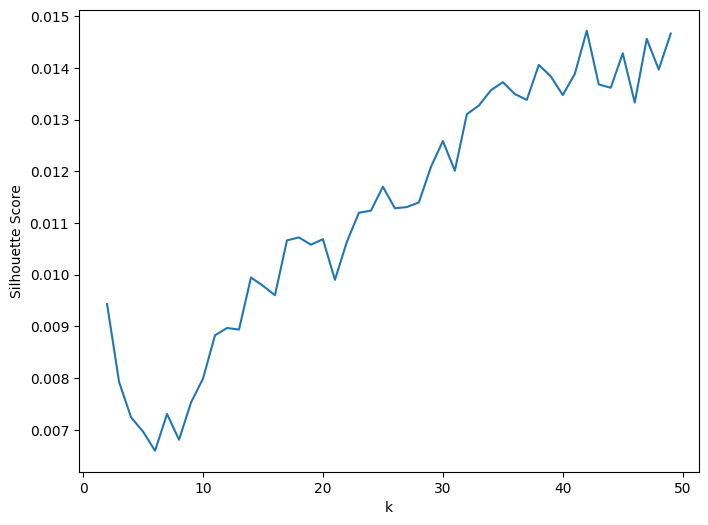

In [29]:
#Visualizing the silhouette scores in a plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,),silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('Silhouette Score')